# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ctypes import *
import os
import platform
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Function of conversion of list of list to simple list 
def toList(arr):
    return [j for i in arr for j in i]

In [3]:
#
path_to_shared_library = "target/debug/librust_lib.dylib"
path_to_shared_library_windows = "target\\debug\\rust_lib.dll"

if(platform.system()=='Windows'):
    my_lib = cdll.LoadLibrary(path_to_shared_library_windows)
else : 
    my_lib = cdll.LoadLibrary(path_to_shared_library)

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

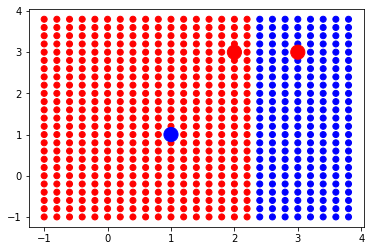

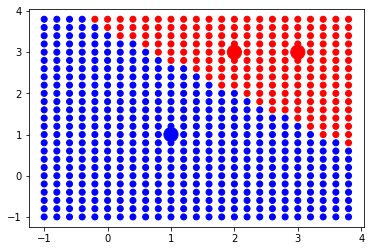

In [7]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

#Convert array to list
dataset_inputs  = toList(X)
dataset_expected_outputs  = Y.tolist()
inputs_len = len(dataset_inputs)
outputs_len = len(dataset_expected_outputs )
output_dim = 1

dataset_inputs_type = c_float * inputs_len
dataset_inputs_native = dataset_inputs_type(*dataset_inputs)
dataset_outputs_type = c_float * outputs_len
dataset_outputs_native = dataset_outputs_type(*dataset_expected_outputs)
sample_inputs_type = c_float * len(X[0])

#create model
my_lib.create_rbf_model.argtypes = [c_int, dataset_inputs_type, c_int, c_int]
my_lib.create_rbf_model.restype = c_void_p

model = my_lib.create_rbf_model(2, dataset_inputs_native, inputs_len, len(X[0]))

#test dataset
test_dataset = [[x1/10, x2 / 10] for x1 in range(-10, 40,2) for x2 in range(-10, 40,2)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]#destroy model

#before training
my_lib.predict_rbf_model_classification.argtypes = [c_void_p, sample_inputs_type]
my_lib.predict_rbf_model_classification.restype = c_float
predicted_outputs = [my_lib.predict_rbf_model_classification(model, sample_inputs_type(*p)) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

#training
my_lib.lloyd2.argtypes = [c_void_p, dataset_inputs_type, c_int, c_int]
my_lib.lloyd2.restype = None
my_lib.lloyd2(model, dataset_inputs_native, inputs_len, 100)

my_lib.train_rbf_model_classification.argtypes = [c_void_p, dataset_inputs_type, dataset_outputs_type, c_int, c_int, c_int, c_float]
my_lib.train_rbf_model_classification.restype = None
my_lib.train_rbf_model_classification(model, dataset_inputs_native, dataset_outputs_native, inputs_len, outputs_len, 100000, 0.0001)

#after training
predicted_outputs = [my_lib.predict_rbf_model_classification(model, sample_inputs_type(*p)) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

#destroy model
my_lib.destroy_rbf_model.argtypes = [c_void_p]
my_lib.destroy_rbf_model.restype = None
my_lib.destroy_rbf_model(model)

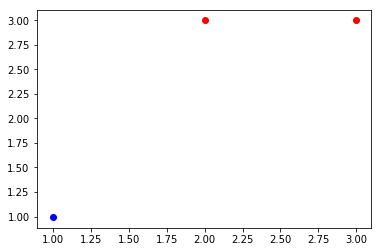

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [ ]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

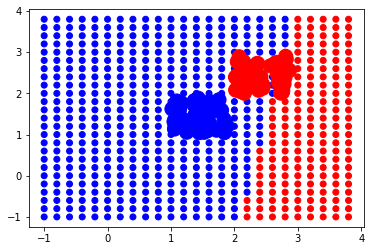

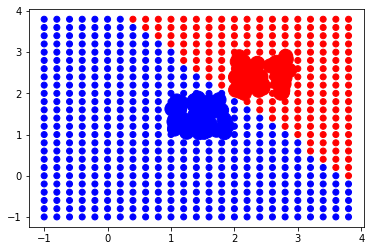

In [9]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

#Convert array to list
dataset_inputs  = toList(X)
dataset_expected_outputs  = Y
inputs_len = len(dataset_inputs)
outputs_len = len(dataset_expected_outputs )
output_dim = 1

dataset_inputs_type = c_float * inputs_len
dataset_inputs_native = dataset_inputs_type(*dataset_inputs)
dataset_outputs_type = c_float * outputs_len
dataset_outputs_native = dataset_outputs_type(*dataset_expected_outputs)
sample_inputs_type = c_float * 2

#create model
my_lib.create_rbf_model.argtypes = [c_int, dataset_inputs_type, c_int, c_int]
my_lib.create_rbf_model.restype = c_void_p

model = my_lib.create_rbf_model(2, dataset_inputs_native, inputs_len, len(X[0]))

#test dataset
test_dataset = [[x1/10, x2 / 10] for x1 in range(-10, 40,2) for x2 in range(-10, 40,2)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

#before training
my_lib.predict_rbf_model_classification.argtypes = [c_void_p, sample_inputs_type]
my_lib.predict_rbf_model_classification.restype = c_float
predicted_outputs = [my_lib.predict_rbf_model_classification(model, sample_inputs_type(*p)) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

#training
my_lib.lloyd2.argtypes = [c_void_p, dataset_inputs_type, c_int, c_int]
my_lib.lloyd2.restype = None
my_lib.lloyd2(model, dataset_inputs_native, inputs_len, 10000)

my_lib.train_rbf_model_classification.argtypes = [c_void_p, dataset_inputs_type, dataset_outputs_type, c_int, c_int, c_int, c_float]
my_lib.train_rbf_model_classification.restype = None
my_lib.train_rbf_model_classification(model, dataset_inputs_native, dataset_outputs_native, inputs_len, outputs_len, 100000, 0.0001)

#after training
predicted_outputs = [my_lib.predict_rbf_model_classification(model, sample_inputs_type(*p)) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

#destroy model
my_lib.destroy_rbf_model.argtypes = [c_void_p]
my_lib.destroy_rbf_model.restype = None
my_lib.destroy_rbf_model(model)

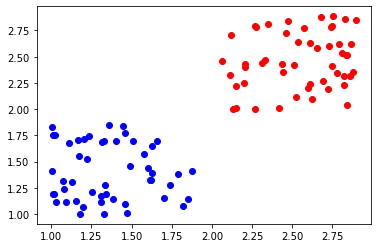

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [ ]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

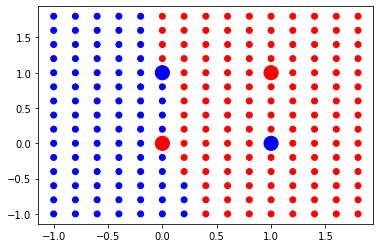

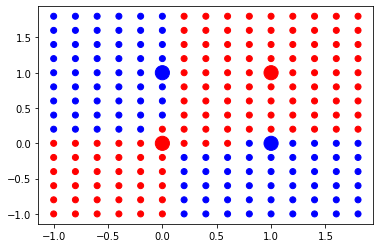

In [12]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])
#Convert array to list
dataset_inputs  = toList(X)
dataset_expected_outputs  = Y
inputs_len = len(dataset_inputs)
outputs_len = len(dataset_expected_outputs )
output_dim = 1

dataset_inputs_type = c_float * inputs_len
dataset_inputs_native = dataset_inputs_type(*dataset_inputs)
dataset_outputs_type = c_float * outputs_len
dataset_outputs_native = dataset_outputs_type(*dataset_expected_outputs)
sample_inputs_type = c_float * 2

#create model
my_lib.create_rbf_model.argtypes = [c_int, dataset_inputs_type, c_int, c_int]
my_lib.create_rbf_model.restype = c_void_p

model = my_lib.create_rbf_model(4, dataset_inputs_native, inputs_len, len(X[0]))

#test dataset
test_dataset = [[x1/10, x2 / 10] for x1 in range(-10, 20,2) for x2 in range(-10,20,2)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

#before training
my_lib.predict_rbf_model_classification.argtypes = [c_void_p, sample_inputs_type]
my_lib.predict_rbf_model_classification.restype = c_float
predicted_outputs = [my_lib.predict_rbf_model_classification(model, sample_inputs_type(*p)) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

#training
my_lib.lloyd2.argtypes = [c_void_p, dataset_inputs_type, c_int, c_int]
my_lib.lloyd2.restype = None
my_lib.lloyd2(model, dataset_inputs_native, inputs_len, 10000)

my_lib.train_rbf_model_classification.argtypes = [c_void_p, dataset_inputs_type, dataset_outputs_type, c_int, c_int, c_int, c_float]
my_lib.train_rbf_model_classification.restype = None
my_lib.train_rbf_model_classification(model, dataset_inputs_native, dataset_outputs_native, inputs_len, outputs_len, 100000, 0.0001)

#after training
predicted_outputs = [my_lib.predict_rbf_model_classification(model, sample_inputs_type(*p)) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

#destroy model
my_lib.destroy_rbf_model.argtypes = [c_void_p]
my_lib.destroy_rbf_model.restype = None
my_lib.destroy_rbf_model(model)

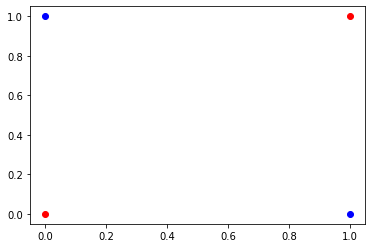

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

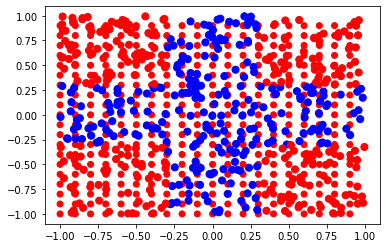

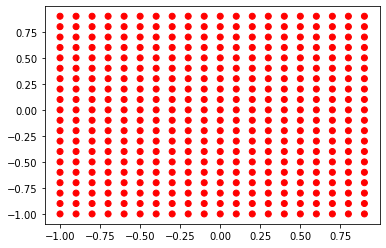

In [23]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])
#Convert array to list
dataset_inputs  = toList(X)
dataset_expected_outputs  = Y
inputs_len = len(dataset_inputs)
outputs_len = len(dataset_expected_outputs )
output_dim = 1

dataset_inputs_type = c_float * inputs_len
dataset_inputs_native = dataset_inputs_type(*dataset_inputs)
dataset_outputs_type = c_float * outputs_len
dataset_outputs_native = dataset_outputs_type(*dataset_expected_outputs)
sample_inputs_type = c_float * 2

#create model
my_lib.create_rbf_model.argtypes = [c_int, dataset_inputs_type, c_int, c_int]
my_lib.create_rbf_model.restype = c_void_p

model = my_lib.create_rbf_model(35, dataset_inputs_native, inputs_len, len(X[0]))

#test dataset
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

#before training
my_lib.predict_rbf_model_classification.argtypes = [c_void_p, sample_inputs_type]
my_lib.predict_rbf_model_classification.restype = c_float
predicted_outputs = [my_lib.predict_rbf_model_classification(model, sample_inputs_type(*p)) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=50)
plt.show()

#training
#training
my_lib.lloyd2.argtypes = [c_void_p, dataset_inputs_type, c_int, c_int]
my_lib.lloyd2.restype = None
my_lib.lloyd2(model, dataset_inputs_native, inputs_len, 10000)

my_lib.train_rbf_model_classification.argtypes = [c_void_p, dataset_inputs_type, dataset_outputs_type, c_int, c_int, c_int, c_float]
my_lib.train_rbf_model_classification.restype = None
my_lib.train_rbf_model_classification(model, dataset_inputs_native, dataset_outputs_native, inputs_len, outputs_len, 100000, 0.0001)
#after training
predicted_outputs = [my_lib.predict_rbf_model_classification(model, sample_inputs_type(*p)) for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
#plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

#destroy model
my_lib.destroy_rbf_model.argtypes = [c_void_p]
my_lib.destroy_rbf_model.restype = None
my_lib.destroy_rbf_model(model)

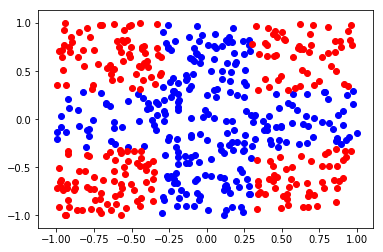

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

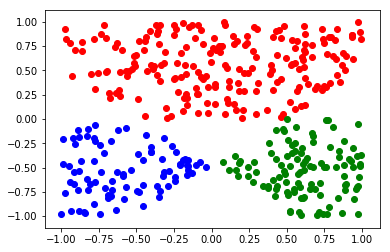

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [ ]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

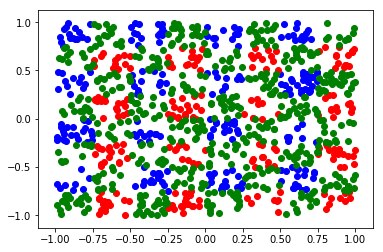

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

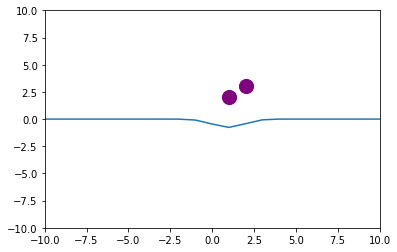

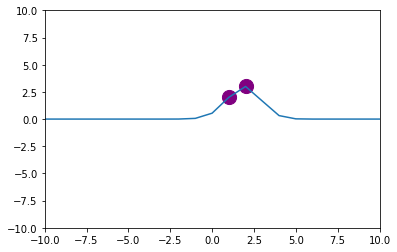

In [34]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

#Convert array to list
dataset_inputs  = toList(X)
dataset_expected_outputs  = Y
inputs_len = len(dataset_inputs)
outputs_len = len(dataset_expected_outputs )
output_dim = 1

dataset_inputs_type = c_float * inputs_len
dataset_inputs_native = dataset_inputs_type(*dataset_inputs)
dataset_outputs_type = c_float * outputs_len
dataset_outputs_native = dataset_outputs_type(*dataset_expected_outputs)
sample_inputs_type = c_float * 1

#create model
my_lib.create_rbf_model.argtypes = [c_int, dataset_inputs_type, c_int, c_int]
my_lib.create_rbf_model.restype = c_void_p

model = my_lib.create_rbf_model(2, dataset_inputs_native, inputs_len, len(X[0]))

#test dataset
test_dataset = [i for i in range(-10, 11)]

#before training
my_lib.predict_rbf_model_regression.argtypes = [c_void_p, sample_inputs_type]
my_lib.predict_rbf_model_regression.restype = c_float

predicted_outputs = [my_lib.predict_rbf_model_regression(model, sample_inputs_type(*[p])) for p in test_dataset]
test_dataset = np.array(test_dataset)

#plot the result
plt.plot(test_dataset, predicted_outputs)
plt.scatter([p for p in dataset_inputs], dataset_expected_outputs, s=200, color='purple')
plt.axis([-10, 10, -10, 10])
plt.show()

#training
my_lib.lloyd2.argtypes = [c_void_p, dataset_inputs_type, c_int, c_int]
my_lib.lloyd2.restype = None
my_lib.lloyd2(model, dataset_inputs_native, inputs_len, 1000)

my_lib.train_em_rbf_model_regression.argtypes = [c_void_p, dataset_inputs_type, dataset_outputs_type, c_int, c_int, c_int, c_float, c_float]
my_lib.train_em_rbf_model_regression.restype = None
my_lib.train_em_rbf_model_regression(model, dataset_inputs_native, dataset_outputs_native, inputs_len, outputs_len, output_dim, 0.0001, 100000)

#after training
predicted_outputs = [my_lib.predict_rbf_model_regression(model, sample_inputs_type(*[p])) for p in test_dataset]
#plot the result
plt.plot(test_dataset, predicted_outputs)
plt.scatter([p for p in dataset_inputs], dataset_expected_outputs, s=200, color='purple')
plt.axis([-10, 10, -10, 10])
plt.show()

#destroy model
my_lib.destroy_rbf_model.argtypes = [c_void_p]
my_lib.destroy_rbf_model.restype = None
my_lib.destroy_rbf_model(model)

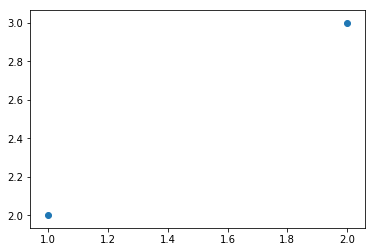

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

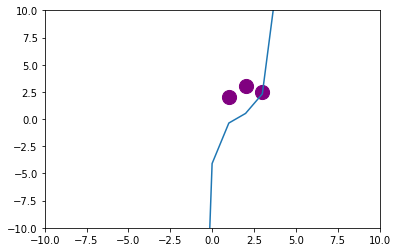

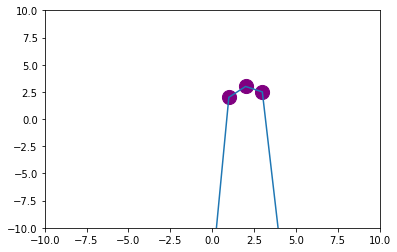

In [33]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

#Convert array to list
dataset_inputs  = toList(X)
dataset_expected_outputs  = Y
inputs_len = len(dataset_inputs)
outputs_len = len(dataset_expected_outputs )
output_dim = 1

dataset_inputs_type = c_float * inputs_len
dataset_inputs_native = dataset_inputs_type(*dataset_inputs)
dataset_outputs_type = c_float * outputs_len
dataset_outputs_native = dataset_outputs_type(*dataset_expected_outputs)
sample_inputs_type = c_float * 1

#create model
my_lib.create_rbf_model.argtypes = [c_int, dataset_inputs_type, c_int, c_int]
my_lib.create_rbf_model.restype = c_void_p

model = my_lib.create_rbf_model(3, dataset_inputs_native, inputs_len, len(X[0]))

#test dataset
test_dataset = [i for i in range(-10, 11)]

#before training
my_lib.predict_rbf_model_regression.argtypes = [c_void_p, sample_inputs_type]
my_lib.predict_rbf_model_regression.restype = c_float

predicted_outputs = [my_lib.predict_rbf_model_regression(model, sample_inputs_type(*[p])) for p in test_dataset]
test_dataset = np.array(test_dataset)

#plot the result
plt.plot(test_dataset, predicted_outputs)
plt.scatter([p for p in dataset_inputs], dataset_expected_outputs, s=200, color='purple')
plt.axis([-10, 10, -10, 10])
plt.show()

#training
my_lib.lloyd2.argtypes = [c_void_p, dataset_inputs_type, c_int, c_int]
my_lib.lloyd2.restype = None
my_lib.lloyd2(model, dataset_inputs_native, inputs_len, 1000)

my_lib.train_em_rbf_model_regression.argtypes = [c_void_p, dataset_inputs_type, dataset_outputs_type, c_int, c_int, c_int, c_float, c_float]
my_lib.train_em_rbf_model_regression.restype = None
my_lib.train_em_rbf_model_regression(model, dataset_inputs_native, dataset_outputs_native, inputs_len, outputs_len, output_dim, 0.0001, 100000)

#after training
predicted_outputs = [my_lib.predict_rbf_model_regression(model, sample_inputs_type(*[p])) for p in test_dataset]
#plot the result
plt.plot(test_dataset, predicted_outputs)
plt.scatter([p for p in dataset_inputs], dataset_expected_outputs, s=200, color='purple')
plt.axis([-10, 10, -10, 10])
plt.show()

#destroy model
my_lib.destroy_rbf_model.argtypes = [c_void_p]
my_lib.destroy_rbf_model.restype = None
my_lib.destroy_rbf_model(model)

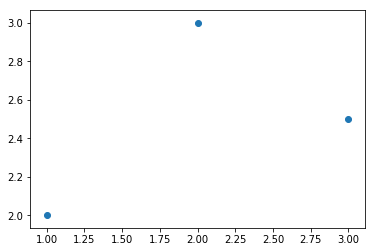

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [5]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

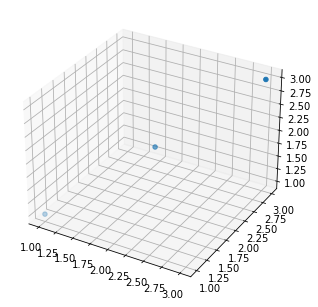

<Figure size 432x288 with 0 Axes>

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [2]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

In [33]:
%matplotlib

Using matplotlib backend: MacOSX


In [35]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

#Convert array to list
dataset_inputs  = toList(X)
dataset_expected_outputs  = Y
inputs_len = len(dataset_inputs)
outputs_len = len(dataset_expected_outputs )
output_dim = 1

dataset_inputs_type = c_float * inputs_len
dataset_inputs_native = dataset_inputs_type(*dataset_inputs)
dataset_outputs_type = c_float * outputs_len
dataset_outputs_native = dataset_outputs_type(*dataset_expected_outputs)
sample_inputs_type = c_float * 2

#create model
my_lib.create_rbf_model.argtypes = [c_int, dataset_inputs_type, c_int, c_int]
my_lib.create_rbf_model.restype = c_void_p

model = my_lib.create_rbf_model(1, dataset_inputs_native, inputs_len, len(X[0]))

#test dataset
test_dataset = [[i,j] for i in range (-5,6) for j in range(-5,6)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

#before training
my_lib.predict_rbf_model_regression.argtypes = [c_void_p, sample_inputs_type]
my_lib.predict_rbf_model_regression.restype = c_float

predicted_outputs = [my_lib.predict_rbf_model_regression(model, sample_inputs_type(*p)) for p in test_dataset]
test_dataset = np.array(test_dataset)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y,c='purple')
ax.scatter(test_dataset[:,0], test_dataset[:,1], predicted_outputs)

#training
my_lib.lloyd2.argtypes = [c_void_p, dataset_inputs_type, c_int]
my_lib.lloyd2.restype = None
my_lib.lloyd2(model, dataset_inputs_native, inputs_len)

my_lib.train_em_rbf_model_regression.argtypes = [c_void_p, dataset_inputs_type, dataset_outputs_type, c_int, c_int, c_int, c_float, c_float]
my_lib.train_em_rbf_model_regression.restype = None
my_lib.train_em_rbf_model_regression(model, dataset_inputs_native, dataset_outputs_native, inputs_len, outputs_len, output_dim, 0.0001, 100000)

#after training
predicted_outputs = [my_lib.predict_rbf_model_regression(model, sample_inputs_type(*p)) for p in test_dataset]
fig = plt.figure()
ax2 = Axes3D(fig)
ax2.scatter(X[:,0],X[:,1],Y,c='purple')
ax2.scatter(test_dataset[:,0], test_dataset[:,1], predicted_outputs)

#destroy model
my_lib.destroy_rbf_model.argtypes = [c_void_p]
my_lib.destroy_rbf_model.restype = None
my_lib.destroy_rbf_model(model)

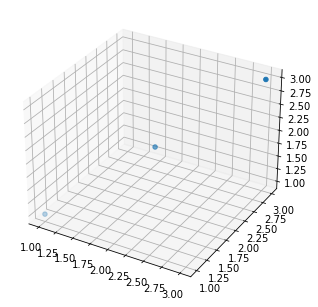

<Figure size 432x288 with 0 Axes>

In [3]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [ ]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

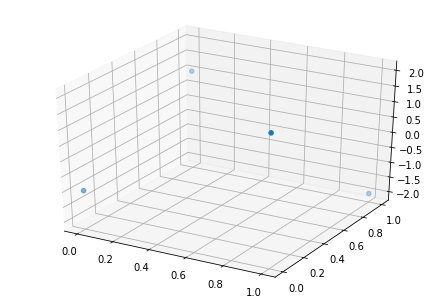

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()